In [233]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [234]:
import warnings
warnings.filterwarnings('ignore')

In [236]:
df=pd.read_csv(r"C:\Users\GFG19717\Desktop\DataSet\ML\Linear_Regression\Simple_Linear_Regression\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


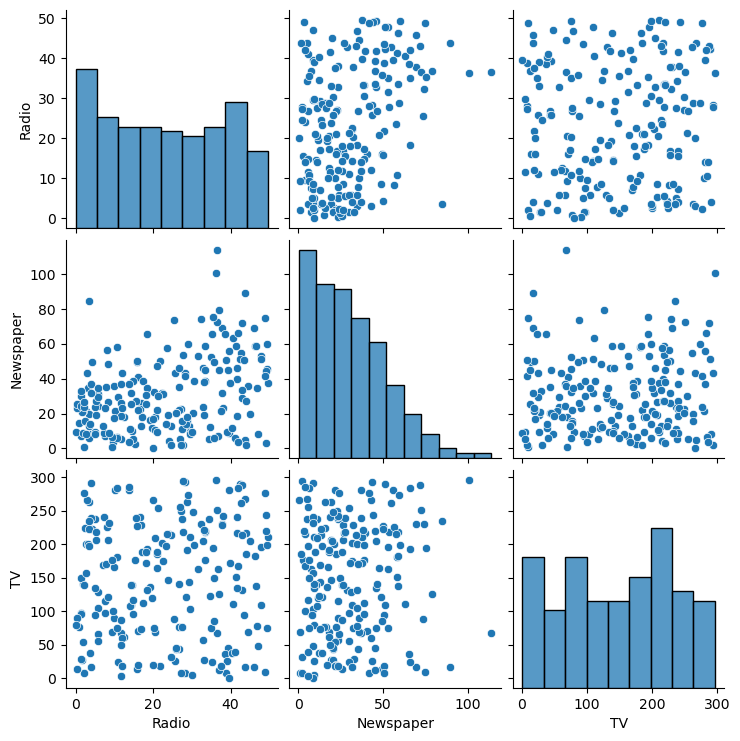

In [12]:
sns.pairplot(data=df, x_vars=['Radio','Newspaper','TV'], y_vars=['Radio','Newspaper','TV'])
plt.show()

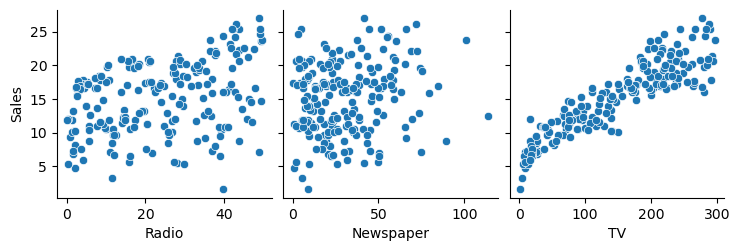

In [4]:
sns.pairplot(data=df, x_vars=['Radio','Newspaper','TV'], y_vars='Sales')
plt.show()

In [6]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

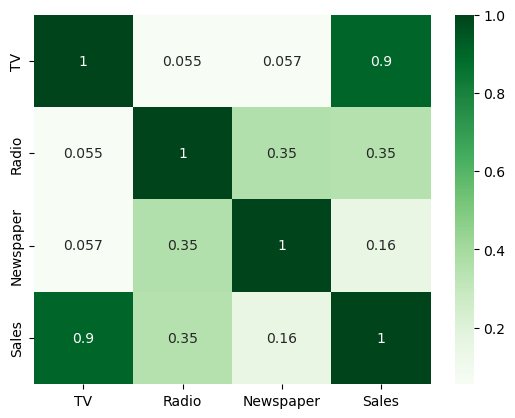

In [14]:
df_1=df.corr()
sns.heatmap(df_1, cmap='Greens', annot=True)
plt.show()

In [9]:
x=df['TV']
y=df['Sales']

In [16]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [17]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)

In [12]:
x_train.shape

(140,)

In [14]:
x_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [16]:
x_test.shape

(60,)

In [13]:
x_test.shape

(60,)

In [19]:
import statsmodels.api as sm

In [20]:
x_train_sm=sm.add_constant(x_train)

In [21]:
x_train_sm.shape

(140, 2)

In [23]:
x_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [22]:
lr=sm.OLS(y_train, x_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.52e-52
Time:                        10:18:54   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y_pred = lr.predict(x_train_sm)  # Predict on the training data
print(y_pred)

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64


In [25]:
y_pred.shape

(140,)

### For PLotting start the graph from 0

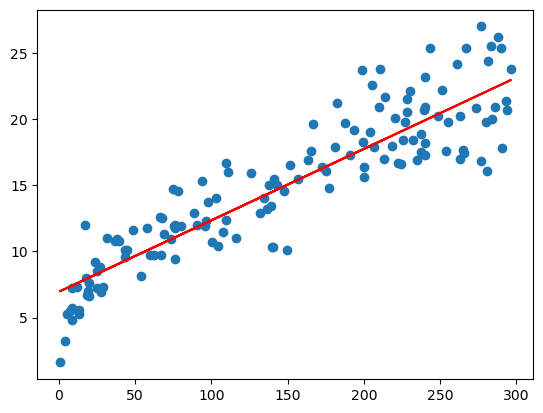

In [79]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [63]:
x_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [64]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [65]:
x_train_sm=sm.add_constant(x_train)

In [69]:
lr=sm.OLS(y_train, x_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           1.52e-52
Time:                        21:22:22   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
y_pred=lr.predict(x_train_sm)

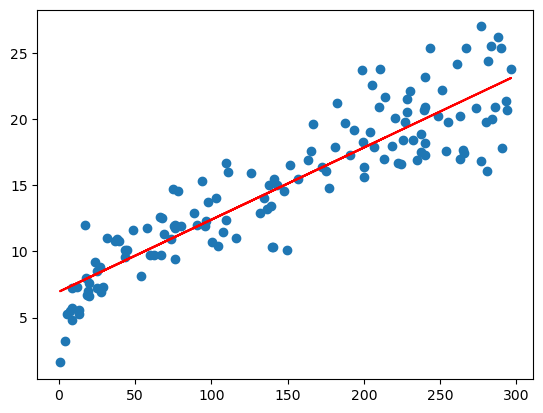

In [84]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9487+0.0545*x_train, 'r')
plt.show()

In [85]:
res=y_train-y_pred

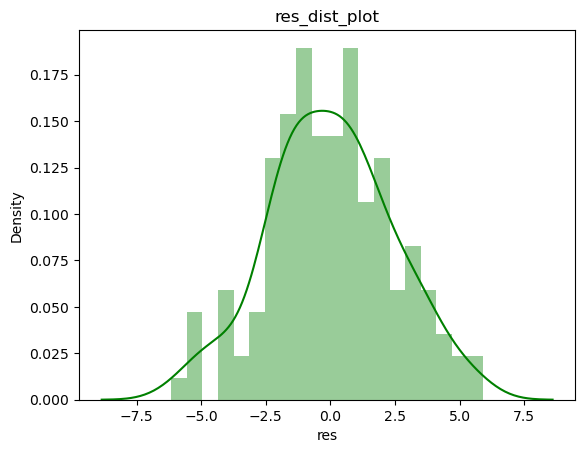

In [88]:
sns.distplot(res, bins=20, color='g')
plt.title('res_dist_plot')
plt.xlabel('res')
plt.show()

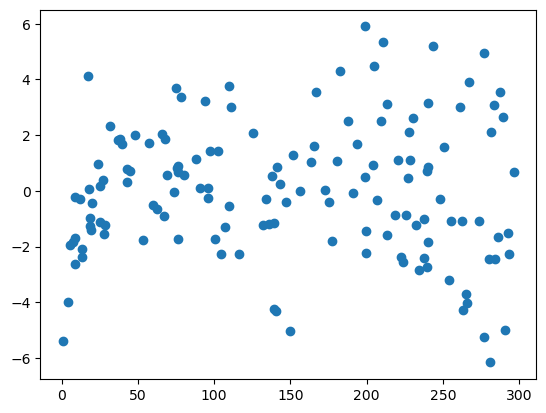

In [89]:
plt.scatter(x_train, res)

### Prediction on the test data

In [90]:
x_test_sm=sm.add_constant(x_test)

In [91]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64

In [95]:
x_test_sm=sm.add_constant(x_test)

In [96]:
y_test_pred=lr.predict(x_test_sm)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [100]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

2.019296008966233

In [101]:
r2_score(y_test, y_test_pred)

0.7921031601245658

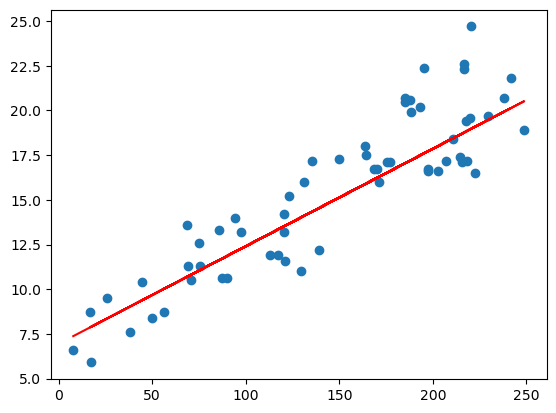

In [105]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')

In [106]:
from sklearn.linear_model import LinearRegression 

In [107]:
from sklearn.model_selection import train_test_split

In [113]:
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size=0.7, random_state=100)

In [115]:
x_train_lm=x_train_lm.values.reshape(-1,1)
x_test_lm=x_test_lm.values.reshape(-1,1)

In [117]:
print(x_train_lm.shape)
print(y_train_lm.shape)
print(x_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [118]:
lm=LinearRegression()
lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [119]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           1.52e-52
Time:                        22:53:35   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

In [121]:
import statsmodels.api as sm

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
from sklearn.linear_model import LinearRegression

In [126]:
from sklearn.metrics import mean_squared_error

In [127]:
from sklearn.metrics import r2_score

In [129]:
df=pd.read_csv(r"C:\Users\GFG19717\Desktop\DataSet\ML\Linear_Regression\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [131]:
df.shape

(200, 4)

In [133]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [134]:
df1=df.corr()

<Axes: >

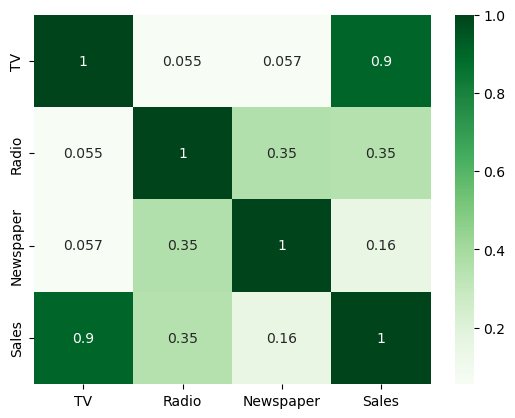

In [135]:
sns.heatmap(df1, cmap='Greens', annot=True)

In [136]:
x=df['TV']
y=df['Sales']

In [138]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7, random_state=100)

In [139]:
x_train.shape

(140,)

In [140]:
x_train_sm=sm.add_constant(x_train)

In [142]:
x_train_sm.shape

(140, 2)

In [143]:
x_test_sm=sm.add_constant(x_test)

lr=sm.OLS(y_train, x_train_sm).fit()

In [145]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.52e-52
Time:                        06:31:12   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
y_pred=lr.predict(x_train_sm)

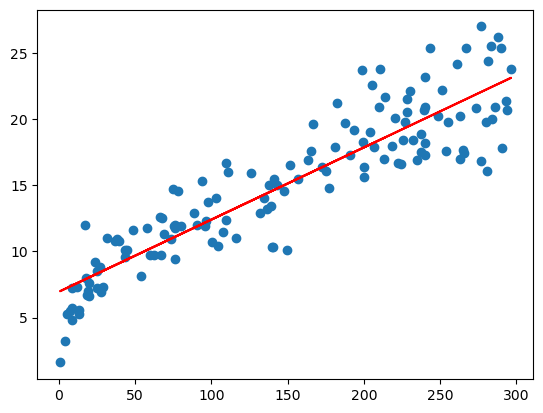

In [152]:
plt.scatter(x_train, y_train)
plt.plot(x_train,y_pred, 'r')
plt.show()

In [153]:
res=y_train-y_pred

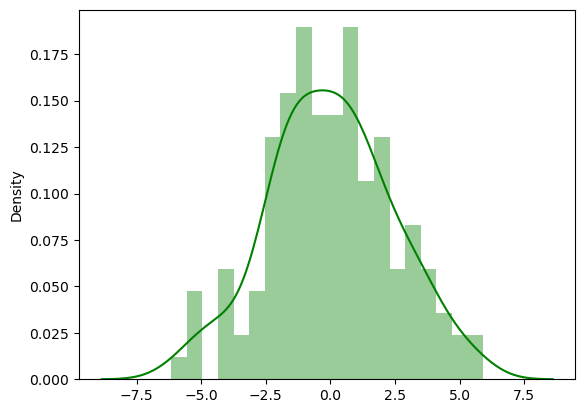

In [157]:
sns.distplot(res, bins=20, color='g')
plt.show()

In [160]:
x_train_lm,x_test_lm,y_train_lm,y_test_lm=train_test_split(x,y,train_size=0.7, random_state=100)

In [162]:
x_train_lm=x_train_lm.values.reshape(-1,1)

In [163]:
x_test_lm=x_test_lm.values.reshape(-1,1)

In [164]:
x_train_lm.shape

(140, 1)

In [168]:
lm=LinearRegression()

In [171]:
lm.fit(x_train_lm, y_train)

LinearRegression()

In [174]:
lm.intercept_

6.9486832000013585

In [178]:
lm.coef_

array([0.05454575])

In [180]:
from sklearn.metrics import r2_score

In [181]:
r2_score(y_train,y_pred)

0.8157933136480389

In [182]:
np.sqrt(mean_squared_error(y_train,y_pred))

2.3984162246129914

# Practice_Linear_Regression(27/02/25)

In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm, numpy as np 

In [2]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
from sklearn.metrics import r2_score

In [11]:
cc=pd.read_csv(r"C:\Users\GFG19717\Desktop\DataSet\ML\Linear_Regression\Simple_Linear_Regression\advertising.csv")
cc

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [12]:
cc.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [14]:
cc.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
cc.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
cc.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

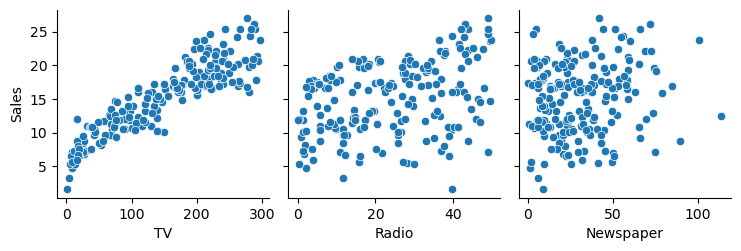

In [20]:
sns.pairplot(data=cc, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')
plt.show()

In [23]:
cc1=cc.corr()
cc1

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

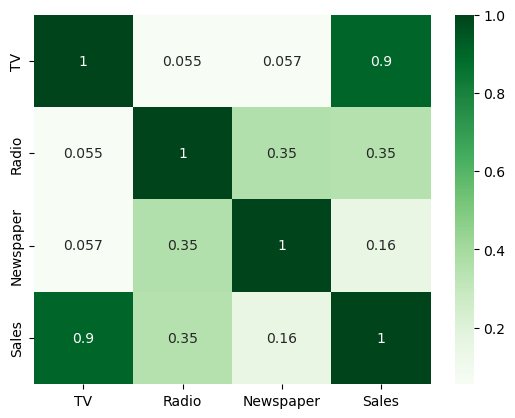

In [25]:
sns.heatmap(cc1, annot=True, cmap='Greens')

In [26]:
x=cc['TV']
y=cc['Sales']
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [27]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [31]:
x_train_sm=sm.add_constant(x_train)
x_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [39]:
lr=sm.OLS(y_train,x_train_sm).fit()

In [87]:
lr.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [53]:
y_pred=lr.predict(x_train_sm)

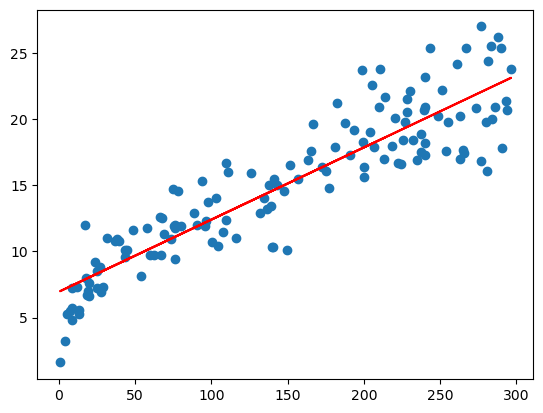

In [54]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred,'r')
plt.show()

In [55]:
res=y_train-y_pred

In [61]:
import warnings
warnings.filterwarnings('ignore')

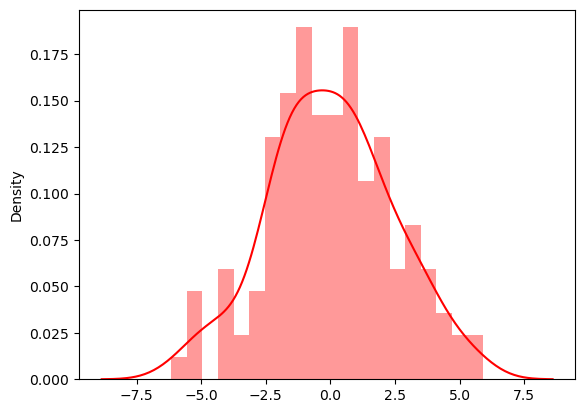

In [63]:
sns.distplot(res, bins=20, color='r')
plt.show()

In [65]:
x_train_lr=x_train.values.reshape(-1,1)

In [66]:
x_train_lr

array([[213.4],
       [151.5],
       [205. ],
       [142.9],
       [134.3],
       [ 80.2],
       [239.8],
       [ 88.3],
       [ 19.4],
       [225.8],
       [136.2],
       [ 25.1],
       [ 38. ],
       [172.5],
       [109.8],
       [240.1],
       [232.1],
       [ 66.1],
       [218.4],
       [234.5],
       [ 23.8],
       [ 67.8],
       [296.4],
       [141.3],
       [175.1],
       [220.5],
       [ 76.4],
       [253.8],
       [191.1],
       [287.6],
       [100.4],
       [228. ],
       [125.7],
       [ 74.7],
       [ 57.5],
       [262.7],
       [262.9],
       [237.4],
       [227.2],
       [199.8],
       [228.3],
       [290.7],
       [276.9],
       [199.8],
       [239.3],
       [ 73.4],
       [284.3],
       [147.3],
       [224. ],
       [198.9],
       [276.7],
       [ 13.2],
       [ 11.7],
       [280.2],
       [ 39.5],
       [265.6],
       [ 27.5],
       [280.7],
       [ 78.2],
       [163.3],
       [213.5],
       [293.6],
       [

In [67]:
x_train_lr.shape

(140, 1)

In [68]:
y_test_lr=y_test.values.reshape(-1,1)

In [74]:
y_train_lr=y_train.values.reshape(-1,1)

In [70]:
y_test.shape

(60,)

In [71]:
y_test_lr.shape

(60, 1)

In [73]:
lr=LinearRegression()

In [88]:
lrs=lr.fit(x_train_lr,y_train_lr)

In [89]:
lrs.intercept_

array([6.9486832])

In [90]:
lrs.coef_

array([[0.05454575]])

In [ ]:
y_pred=lrs.pred

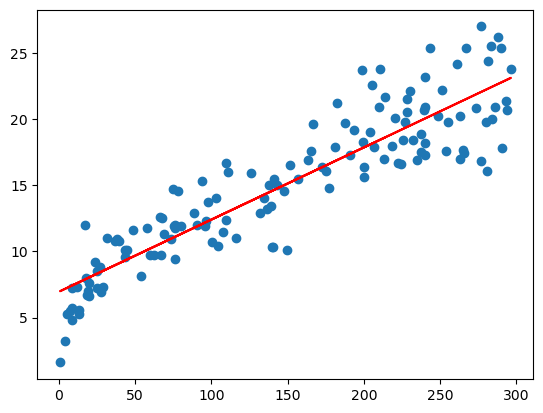

In [92]:
plt.scatter(x_train,y_train)
plt.plot(x_train,0.05455*x_train+6.9486832, 'r')
plt.show()

In [95]:
y_pred=lrs.predict(x_train_lr)

In [97]:
res=y_train_lr-y_pred

In [98]:
res

array([[-1.58874687],
       [ 1.28763523],
       [ 4.46943745],
       [ 0.25672871],
       [-0.27417782],
       [ 0.57674742],
       [-2.72875475],
       [ 1.13492682],
       [-1.40687081],
       [-0.86511421],
       [-1.17781475],
       [ 0.1822184 ],
       [ 1.87857819],
       [ 0.04217442],
       [ 3.76219313],
       [-1.84511848],
       [-1.20875245],
       [ 2.04584253],
       [-0.86147564],
       [-2.83966226],
       [ 0.95312788],
       [ 1.85311475],
       [ 0.68395564],
       [ 0.84400191],
       [-0.39964454],
       [ 1.12397828],
       [-1.71597872],
       [-3.19239529],
       [-0.07237658],
       [ 3.56395826],
       [-1.72507679],
       [ 2.11488514],
       [ 2.09491566],
       [ 3.67674906],
       [ 1.71493601],
       [-1.07785249],
       [-4.28876164],
       [-2.39784494],
       [ 0.45852174],
       [-2.24692463],
       [ 1.09852141],
       [-5.00513357],
       [ 4.94759782],
       [-1.44692463],
       [ 0.69851813],
       [-0

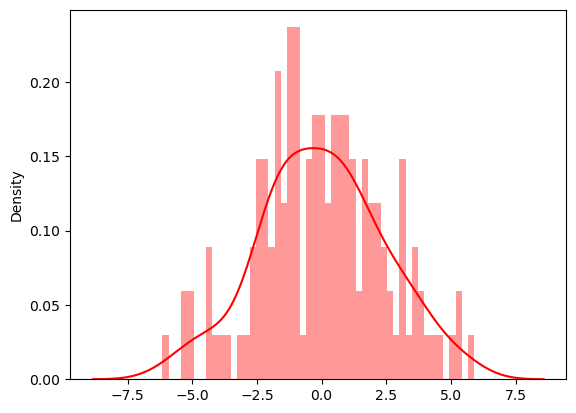

In [101]:
sns.distplot(res,bins=50, color='r')
plt.show()

# Multiple _Linear_Regression

In [168]:
mlp=pd.read_csv(r"C:\Users\GFG19717\Desktop\DataSet\ML\Linear_Regression\Multiple Linear Regression\Housing.csv")
mlp

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [103]:
mlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [104]:
mlp.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [106]:
mlp.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [111]:
mlp.nunique

<bound method DataFrame.nunique of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no      

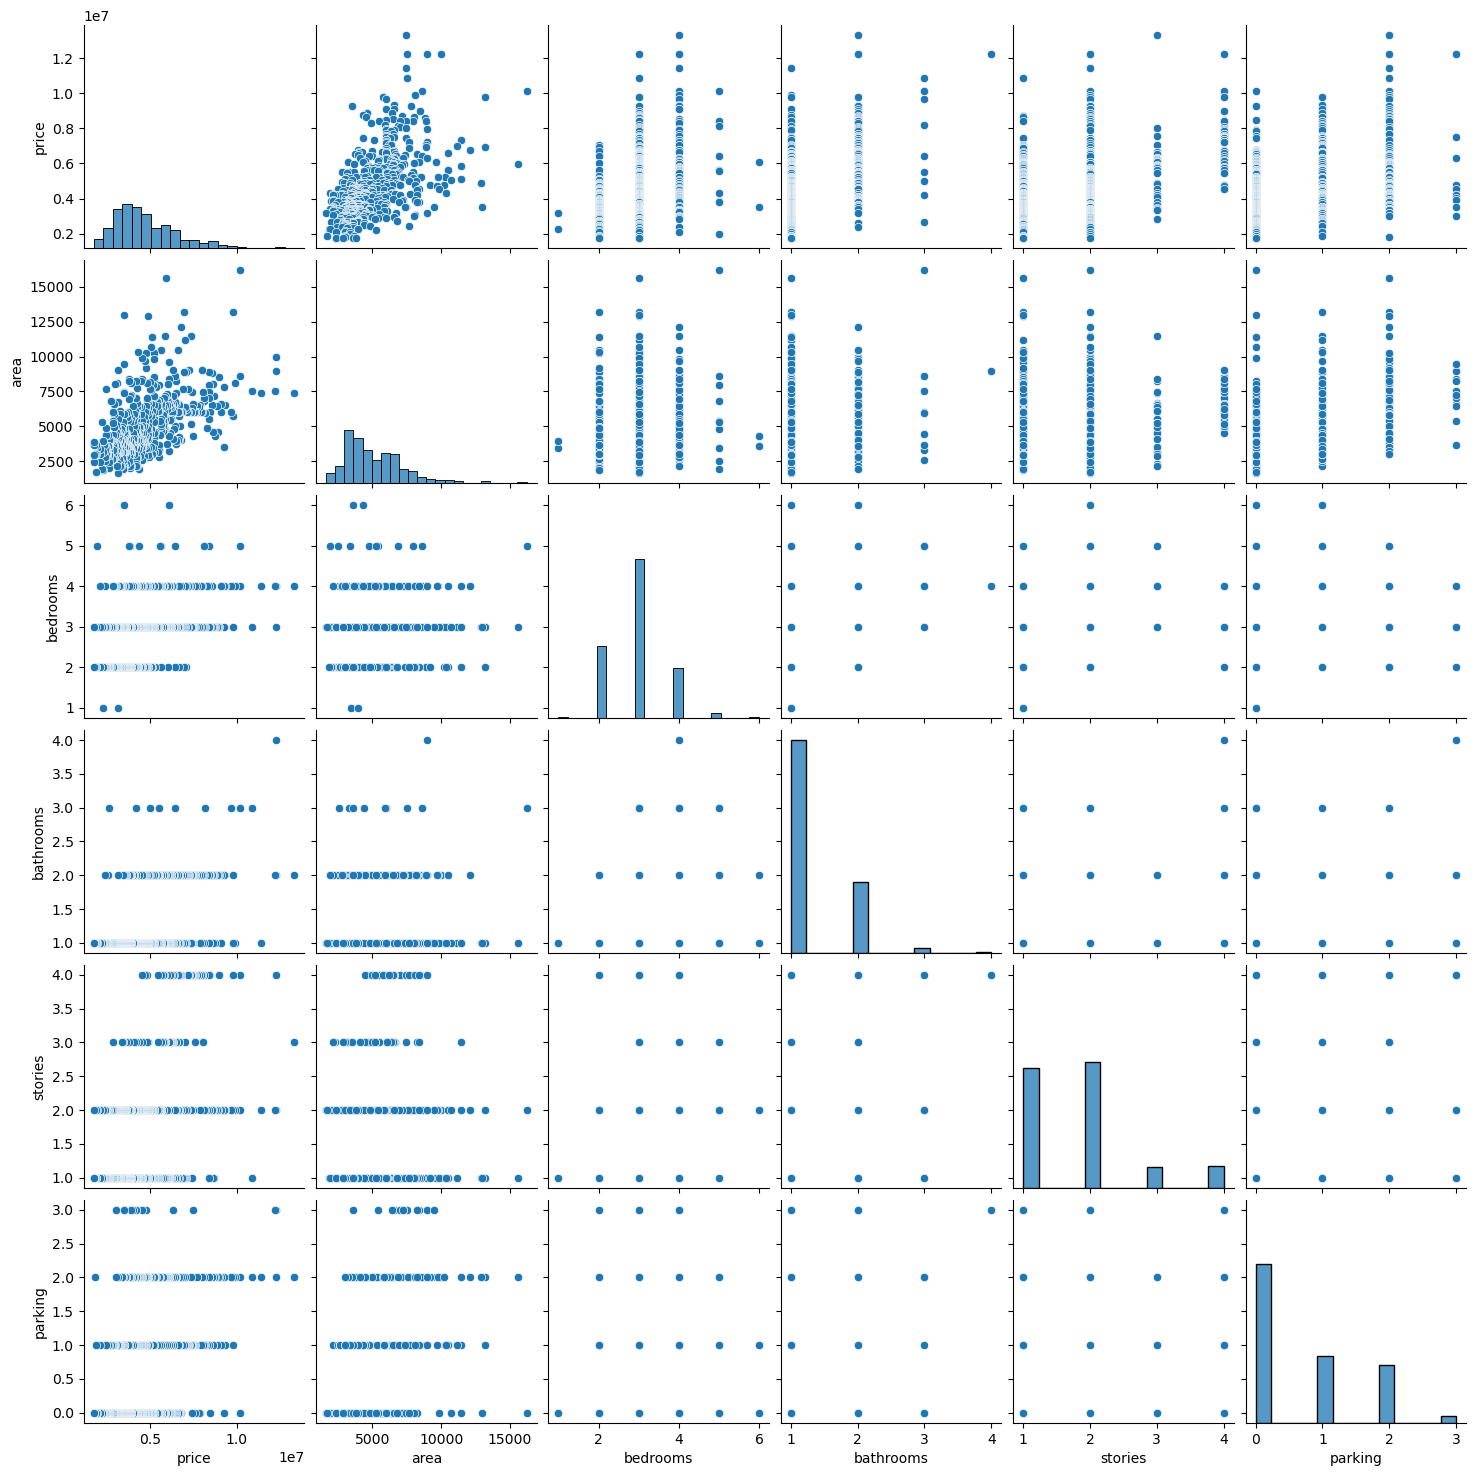

In [112]:
sns.pairplot(mlp)

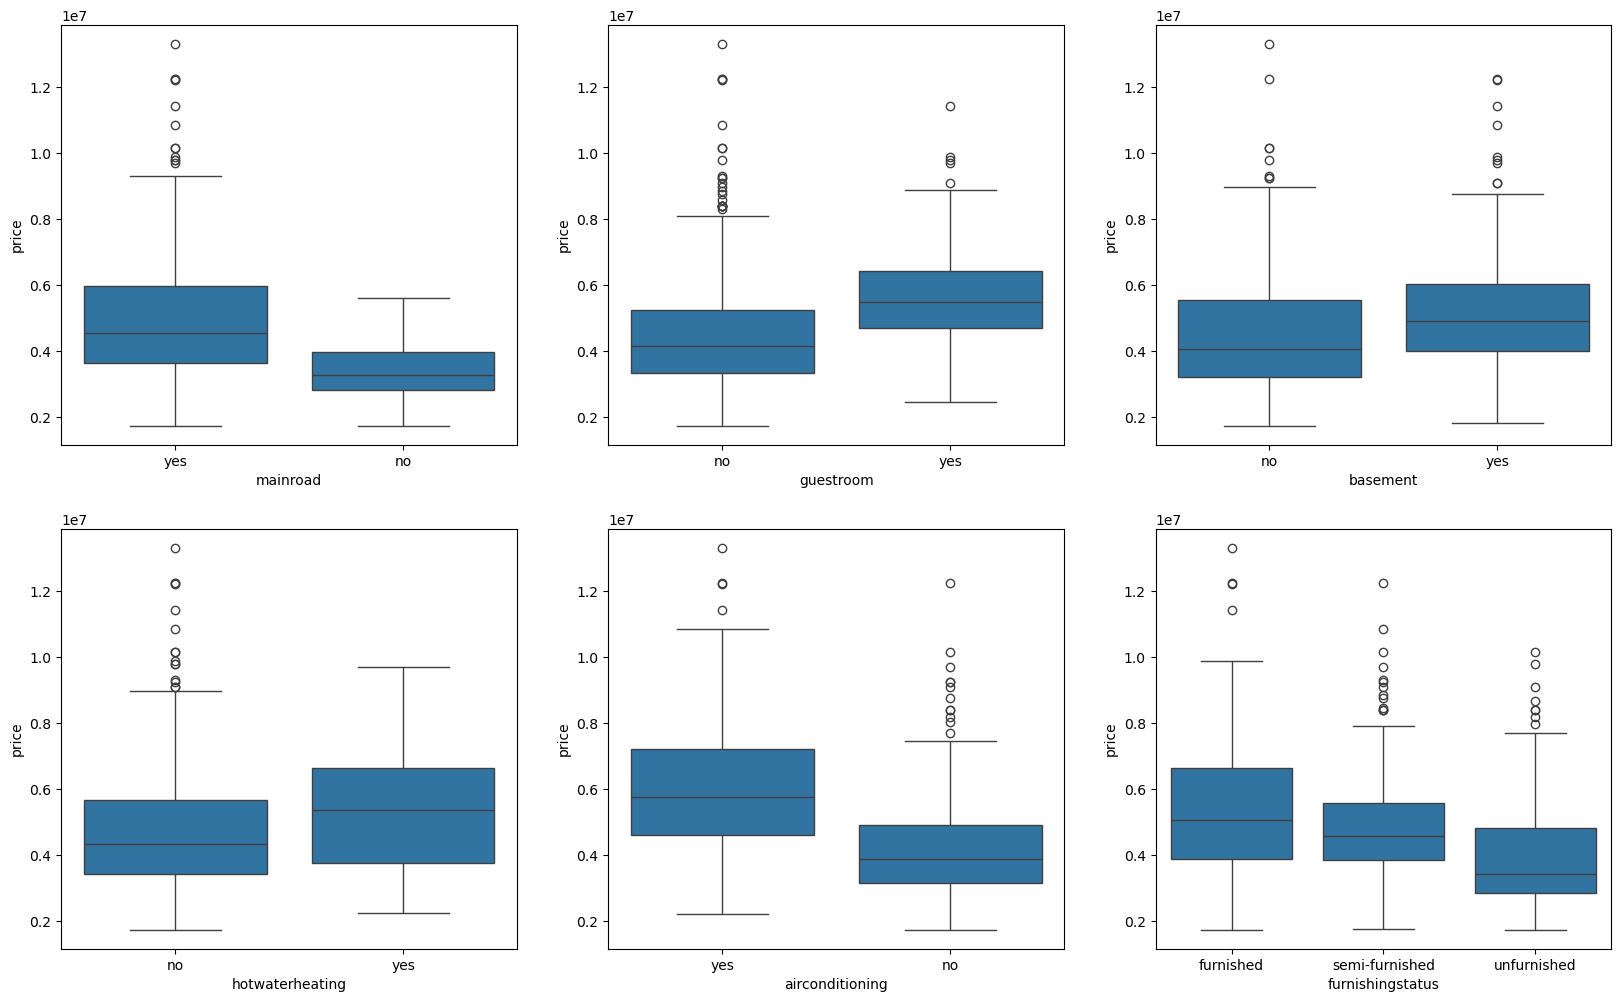

In [127]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = mlp)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = mlp)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = mlp)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = mlp)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = mlp)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = mlp)
plt.show()

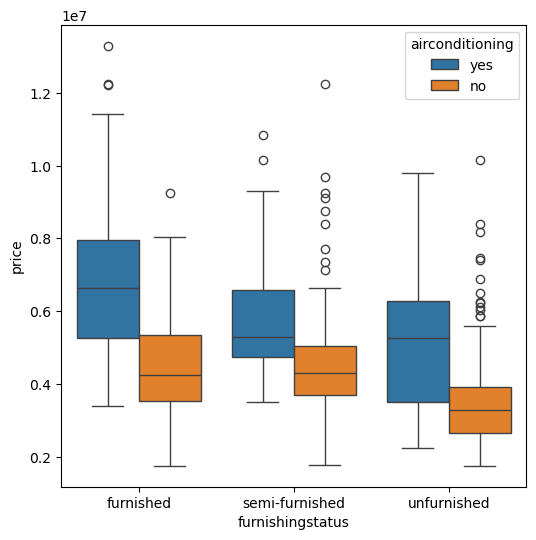

In [130]:
plt.figure(figsize=(6,6))
sns.boxplot(x='furnishingstatus',y='price',hue='airconditioning',data=mlp)
plt.show()

In [132]:
mlp['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [169]:
varlist=['mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning','prefarea']
varlist

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [170]:
def map_convert(x):
    return x.map({'yes':1,'no':0})
mlp[varlist]=mlp[varlist].apply(map_convert)

In [171]:
mlp.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [220]:
mlp.shape

(545, 14)

In [144]:
status=pd.get_dummies(mlp['furnishingstatus'], dtype=int)

In [145]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [148]:
status = pd.get_dummies(mlp['furnishingstatus'], drop_first = True, dtype=int)

In [150]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [172]:
mlp=pd.concat([mlp,status],axis=1)

In [221]:
mlp

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [224]:
mlp.shape

(545, 14)

In [226]:
mlp.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
semi-furnished      0
unfurnished         0
dtype: int64

In [227]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

mlp_train[num_vars] = scaler.fit_transform(mlp_train[num_vars])

In [228]:
mlp.shape

(545, 14)

In [230]:
mlp

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [231]:
mlp.drop(['furnishingstatus'], axis=1, inplace=False)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [232]:
mlp.shape

(545, 14)

In [229]:
x_train, X_test, y_train, y_test = train_test_split(mlp,x, y, test_size=0.3, random_state=100)

ValueError: Found input variables with inconsistent numbers of samples: [545, 200, 200]

In [237]:
even=df.iloc[0::2,:]
even

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
2,17.2,45.9,69.3,12.0
4,180.8,10.8,58.4,17.9
6,57.5,32.8,23.5,11.8
8,8.6,2.1,1.0,4.8
...,...,...,...,...
190,39.5,41.1,5.8,10.8
192,17.2,4.1,31.6,5.9
194,149.7,35.6,6.0,17.3
196,94.2,4.9,8.1,14.0


In [238]:
odd=df.iloc[1::2,:]
odd

,TV,Radio,Newspaper,Sales
1,44.5,39.3,45.1,10.4
3,151.5,41.3,58.5,16.5
5,8.7,48.9,75.0,7.2
7,120.2,19.6,11.6,13.2
9,199.8,2.6,21.2,15.6
...,...,...,...,...
191,75.5,10.8,6.0,11.9
193,166.8,42.0,3.6,19.6
195,38.2,3.7,13.8,7.6
197,177.0,9.3,6.4,14.8


In [240]:
pd.concat([even,odd], axis=1)

,TV,Radio,Newspaper,Sales,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1,NaN,NaN,NaN,NaN
2,17.2,45.9,69.3,12.0,NaN,NaN,NaN,NaN
4,180.8,10.8,58.4,17.9,NaN,NaN,NaN,NaN
6,57.5,32.8,23.5,11.8,NaN,NaN,NaN,NaN
8,8.6,2.1,1.0,4.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
191,NaN,NaN,NaN,NaN,75.5,10.8,6.0,11.9
193,NaN,NaN,NaN,NaN,166.8,42.0,3.6,19.6
195,NaN,NaN,NaN,NaN,38.2,3.7,13.8,7.6
197,NaN,NaN,NaN,NaN,177.0,9.3,6.4,14.8


In [242]:
pd.concat([even,odd], axis=0)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
2,17.2,45.9,69.3,12.0
4,180.8,10.8,58.4,17.9
6,57.5,32.8,23.5,11.8
8,8.6,2.1,1.0,4.8
...,...,...,...,...
191,75.5,10.8,6.0,11.9
193,166.8,42.0,3.6,19.6
195,38.2,3.7,13.8,7.6
197,177.0,9.3,6.4,14.8


In [245]:
df0_5=df.iloc[0:6,:]

In [246]:
df0_10=df.iloc[0:11,:]

In [250]:
df3=df0_10.merge(df0_5, how='right', on='Sales')
df3

,TV_x,Radio_x,Newspaper_x,Sales,TV_y,Radio_y,Newspaper_y
0,230.1,37.8,69.2,22.1,230.1,37.8,69.2
1,44.5,39.3,45.1,10.4,44.5,39.3,45.1
2,17.2,45.9,69.3,12.0,17.2,45.9,69.3
3,151.5,41.3,58.5,16.5,151.5,41.3,58.5
4,180.8,10.8,58.4,17.9,180.8,10.8,58.4
5,8.7,48.9,75.0,7.2,8.7,48.9,75.0
